In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

df = pd.read_csv("Data/train.csv")
df_test = pd.read_csv("Data/test.csv")

In [4]:
df = df.drop('ID',axis=1)
#df = pd.DataFrame(np.where(df, 1, 0))
df.head()

,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,evening,19,10,13,False,Bangkok,Asia,Clear,27.8,9.00,...,False,False,False,False,False,False,False,False,False,2
1,night,5,19,13,True,New_York,America,Clear,26.1,8.70,...,False,False,False,False,False,False,False,False,False,5
2,evening,19,46,0,True,New_York,America,Clear,24.7,16.82,...,False,False,False,False,False,False,False,False,False,3
3,morning,11,10,0,True,Hobart,Australia,Clear,12.7,13.25,...,False,False,False,False,False,False,False,False,False,4
4,evening,18,32,13,True,Los_Angeles,America,PartlyCloudy,19.1,5.78,...,False,False,False,False,False,False,False,False,False,3


In [13]:
data_class = df.groupby("class")
print(data_class.size()/data_class.size().sum()*100)
# 佔百分比

class
0    22.500000
1    12.849162
2    20.642458
3    12.416201
4    11.885475
5    19.706704
dtype: float64


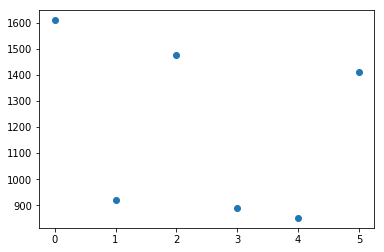

In [15]:
X = data_class.size().index
Y = data_class.size().values
plt.plot(X,Y,'o')

In [7]:
data_class = df.groupby("appearedTimeOfDay")
print(data_class.size())

appearedTimeOfDay
afternoon    1045
evening      1023
morning      1311
night        3781
dtype: int64


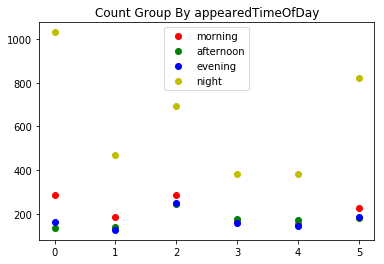

In [8]:
d1 = data_class.get_group('morning').groupby('class')
d2 = data_class.get_group('afternoon').groupby('class')
d3 = data_class.get_group('evening').groupby('class')
d4 = data_class.get_group('night').groupby('class')

plt.plot(d1.size(),'ro',label = 'morning')
plt.plot(d2.size(),'go',label = 'afternoon')
plt.plot(d3.size(),'bo',label = 'evening')
plt.plot(d4.size(),'yo',label = 'night')
plt.legend(loc='best')
plt.title('Count Group By appearedTimeOfDay')
plt.show()

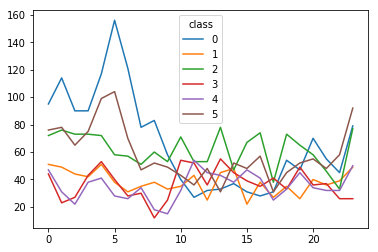

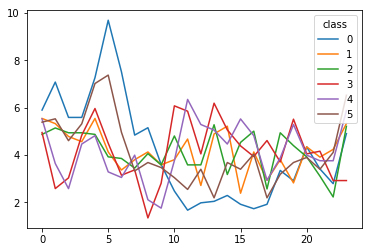

In [19]:
data_class1 = df.groupby("class")
d_dic = pd.DataFrame(columns= X)
data_class2 = df.groupby("appearedHour")
#print(data_class.size())
for i in range(24):    
    d_dic.loc[i] = data_class2.get_group(i).groupby('class').size()
d_dic.plot()

for i in d_dic.columns:
    #print(i)
    d_dic[i] = d_dic[i]/data_class1.size()[i]*100
d_dic.head(24)
#print(d_dic[27].sum())
d_dic.plot()

In [10]:
epochs = 250
train_ratio = 0.8
lr = 0.002
max_units = 20
batch_size = 100

drop_list =[]
for i in range(1,152):
    if(i in d_dic.columns):
        continue;
    else:
        drop_list.append('cooc_'+str(i))
#print(drop_list)

df2 = df.drop(['appearedTimeOfDay','class','city','continent','weather','weatherIcon'],axis=1)
df2 = df2.drop(drop_list,axis=1)
df_test_drop = df_test.drop(['id','appearedTimeOfDay','city','continent','weather','weatherIcon'],axis=1)
data_cols = df2.columns

x_test_data = df_test_drop.values
#y_test_data = df_test_drop.values

x_ = df2.values
y_ = df['class'].values
y_one_hot = pd.get_dummies(df['class'],'').values
#simpson_y = pd.get_dummies(simpson_img['classname'], '').as_matrix()#將label做 one_hot encoding
#print(simpson_y)

print(x_)
print(y_one_hot)

#----------------------------資料training set, testing set 分割---------------------------------------
x_train, x_test, y_train, y_test = train_test_split(x_, 
                                                    y_one_hot, 
                                                    test_size = 0.2, 
                                                    stratify  = y_)
#資料training set, validation set 分割
x_train, x_valid, y_train, y_valid = train_test_split(x_train, 
                                                      y_train, 
                                                      test_size = 1.0 - train_ratio,
                                                      stratify = y_train.argmax(axis = 1))
#------------------------------------檢查資料---------------------------------------------------------
print("training set data dimension")
print(x_train.shape)
print(len(data_cols))
print(y_train.shape)
print(len(X))
print("-----------")
print("training set: %i" % len(x_train))
print("validation set: %i" % len(x_valid))
print("testing set: %i" % len(x_test))

[[19 10 13 ... False False False]
 [5 19 13 ... False False False]
 [19 46 0 ... False False False]
 ...
 [15 53 12 ... False False False]
 [0 28 7 ... False False False]
 [7 19 12 ... False False False]]
[[0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 ...
 [0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]]
training set data dimension
(4582, 31)
31
(4582, 6)
6
-----------
training set: 4582
validation set: 1146
testing set: 1432


In [11]:
a = np.zeros(6)
b = np.zeros(6)
c = np.zeros(6)
for i in y_train:
    for j in range(6):
        a[j] = a[j] + i[j]
for i in y_test:
    for j in range(6):
        b[j] = b[j] + i[j]     
for i in y_valid:
    for j in range(6):
        c[j] = c[j] + i[j]             

print(a)
print(a/a.sum()*100)
print(b)
print(b/b.sum()*100)
print(c)
print(c/c.sum()*100)

[1031.  589.  945.  569.  545.  903.]
[22.50109123 12.85464863 20.62418158 12.41815801 11.89436927 19.70755129]
[322. 184. 296. 178. 170. 282.]
[22.48603352 12.84916201 20.67039106 12.4301676  11.87150838 19.69273743]
[258. 147. 237. 142. 136. 226.]
[22.51308901 12.82722513 20.68062827 12.39092496 11.86736475 19.72076789]


In [12]:
# ------------------------------------graph-----------------------------------------
tf.reset_default_graph() # clean graph
n_layers = 5


# Declare the input node
with tf.name_scope('input'):
    x_input = tf.placeholder(shape = (None,len(data_cols)), 
                             name = 'x_input',
                             dtype=tf.float32)
    y_out = tf.placeholder(shape = (None,len(X)), 
                           name = 'y_label',
                           dtype=tf.float32)
    drp_rate = tf.placeholder(dtype=tf.float32, name = 'dropout')
    is_train = tf.placeholder(dtype=tf.bool)
# --------------------Declare the network structure----------------------------
with tf.variable_scope('hidden_layer1'):
    x_h1 = tf.layers.dense(inputs= x_input, units= max_units, activation=tf.nn.relu)
    x_h1 = tf.layers.dropout(inputs=x_h1, rate=drp_rate, training=is_train)
#with tf.variable_scope('hidden_layer2'):
#    x_h2 = tf.layers.dense(inputs= x_h1, units= max_units, activation=tf.nn.relu)
#    x_h2 = tf.layers.dropout(inputs=x_h2, rate=drp_rate, training=is_train)
#with tf.variable_scope('hidden_layer3'):
#    x_h3 = tf.layers.dense(inputs= x_h2, units= max_units, activation=tf.nn.relu)
#    x_h3 = tf.layers.dropout(inputs=x_h3, rate=drp_rate, training=is_train)
#with tf.variable_scope('hidden_layer4'):
#    x_h4 = tf.layers.dense(inputs= x_h3, units= max_units, activation=tf.nn.relu)
#    x_h4 = tf.layers.dropout(inputs=x_h4, rate=drp_rate, training=is_train)
#with tf.variable_scope('hidden_layer5'):
#    x_h5 = tf.layers.dense(inputs= x_h4, units= max_units, activation=tf.nn.relu)
#    x_h5 = tf.layers.dropout(inputs=x_h5, rate=drp_rate, training=is_train)
with tf.variable_scope('output_layer'):
    output = tf.layers.dense(x_h1, 6)
    y_pred = tf.nn.softmax(output)
with tf.name_scope('cross_entropy'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output, labels=y_out))
    
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(output),1), tf.argmax(y_out,1))
    compute_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)
    #train_step = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)
    

100%|██████████| 250/250 [00:30<00:00,  8.56it/s]


--- training done ---
D 0.00 testing accuracy: 0.30


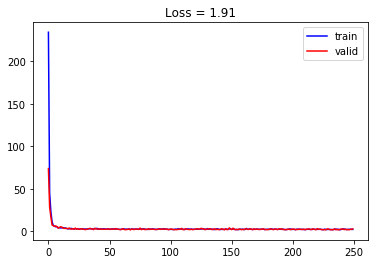

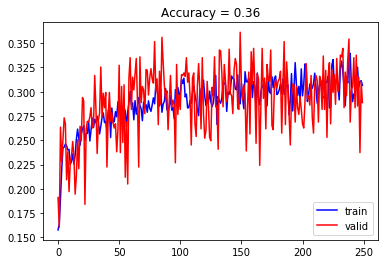

In [14]:
#--------------------------------------sess--------------------------------------------
#with tf.Session() as sess:
g_train_loss, g_valid_loss = [], []
g_train_acc, g_valid_acc = [], []

#0.02 => 0.5
#0.04 => 0.51

for drop_rate in [0.0]:
    sess = tf.Session()
    # we have to initalize all variables (e.g. weights/biases) at the begin
    sess.run([tf.global_variables_initializer()])
    train_loss_list, valid_loss_list = [], []
    train_acc_list, valid_acc_list = [], []
    
    for i in tqdm(range(epochs)):
        # get batch 
        total_batch = int(np.floor(len(x_train) / batch_size)) # just drop out last few samples...

        train_loss_collector, train_acc_collector = [], []
        for j in np.arange(total_batch):
            batch_idx_start = j * batch_size
            batch_idx_stop = (j+1) * batch_size

            x_batch = x_train[batch_idx_start : batch_idx_stop]
            y_batch = y_train[batch_idx_start : batch_idx_stop]

            this_loss, this_acc, _ = sess.run([loss, compute_acc,train_step],
                                        feed_dict = {x_input: x_batch,
                                                     drp_rate: drop_rate,
                                                     is_train: True,
                                                     y_out: y_batch})
            train_loss_collector.append(this_loss)
            train_acc_collector.append(this_acc)

            # do validation at the end of each epoch
        valid_acc, valid_loss = sess.run([compute_acc, loss],
                                             feed_dict = {x_input: x_valid,
                                                          drp_rate: 0.0,
                                                          is_train: False,
                                                          y_out : y_valid})
        valid_loss_list.append(valid_loss)
        valid_acc_list.append(valid_acc)
        train_loss_list.append(np.mean(train_loss_collector))
        train_acc_list.append(np.mean(train_acc_collector))

            # at the end of each epoch, shuffle the data
        x_train, y_train = shuffle(x_train, y_train)
    # At the end of the training, do testing set
    test_acc, test_loss = sess.run([compute_acc, loss],
                                     feed_dict = {x_input: x_test,
                                                  drp_rate: 0.0,
                                                  is_train: False,
                                                  y_out : y_test})
    print('--- training done ---')
    print('D %.2f'%drop_rate + ' testing accuracy: %.2f' % test_acc)
    #--------------------------------------plot---------------------------------------------
    plt.plot(np.arange(len(train_loss_list)), train_loss_list, 'b', label = 'train')
    plt.plot(np.arange(len(valid_loss_list)), valid_loss_list, 'r', label = 'valid')
    plt.legend()
    plt.title("Loss = %.2f"%min(train_loss_list))
    plt.show()

    plt.plot(np.arange(len(train_acc_list)), train_acc_list, 'b', label = 'train')
    plt.plot(np.arange(len(valid_acc_list)), valid_acc_list, 'r', label = 'valid')
    plt.legend(loc = 4)
    plt.title("Accuracy = %.2f"%max(valid_acc_list))
    plt.show()